[*********************100%%**********************]  1 of 1 completed
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

Model Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       406
           1       0.51      1.00      0.68       423

    accuracy                           0.51       829
   macro avg       0.26      0.50      0.34       829
weighted avg       0.26      0.51      0.34       829



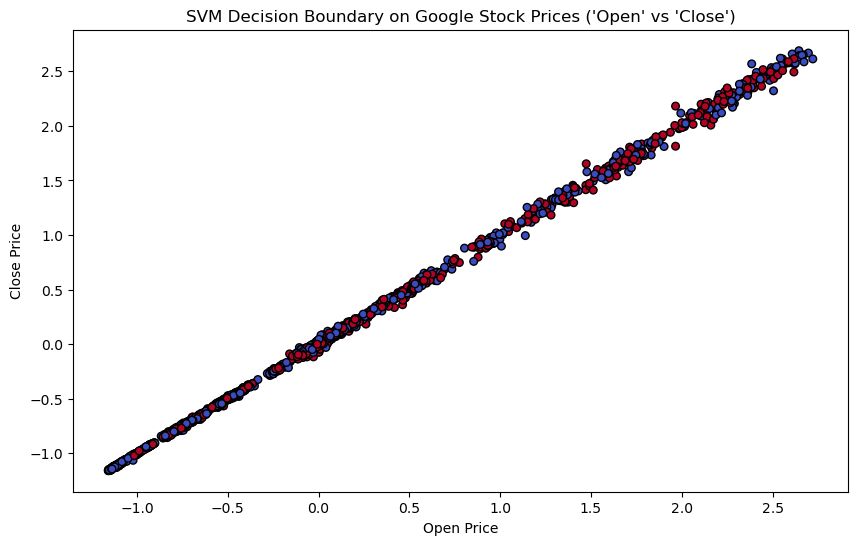

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Download stock data from yfinance
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'
data = yf.download(stock, start=start, end=end)

# Step 2: Preprocess the data
# Create a column to represent whether the stock price increased (1) or decreased (0)
data['Price_Movement'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Drop rows with missing values (i.e., last row because we shifted data)
data = data.dropna()

# Features and Target
X = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
y = data['Price_Movement'].values

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = svm_model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Step 8: Visualization (Using 'Open' and 'Close' columns for 2D plotting)
plt.figure(figsize=(10, 6))

# Use 'Open' and 'Close' columns for visualization
X_vis = X_train[:, [0, 3]]  # 'Open' and 'Close' columns
y_vis = y_train

# Train the SVM again for visualization with 2D features
svm_vis = SVC(kernel='linear')
svm_vis.fit(X_vis, y_vis)

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))

Z = svm_vis.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot support vectors and decision boundary
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

plt.title("SVM Decision Boundary on Google Stock Prices ('Open' vs 'Close')")
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()
